In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
games = pd.read_csv("../cleaned_data/games_cleaned.csv")
sales = pd.read_csv("../cleaned_data/vgsales_cleaned.csv")
merged = pd.read_csv("../merged_data/merged_data.csv")

In [4]:
games.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,4300,"Adventure, RPG",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,3500,"Adventure, Indie, RPG, Turn Based Strategy","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,"Adventure, Indie, Platform",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


In [5]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
merged.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,4300,"Adventure, RPG",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,3500,"Adventure, Indie, RPG, Turn Based Strategy","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,"Adventure, Indie, Platform",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


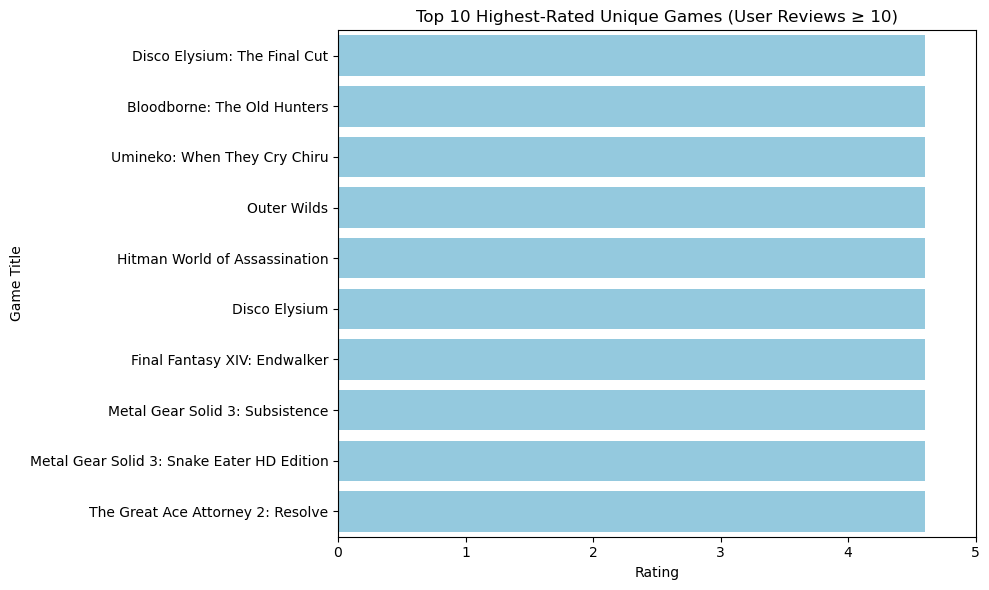

In [7]:
#1 What are the top-rated games by user reviews?
top_rated = games.sort_values(by="Rating", ascending=False).drop_duplicates().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Rating", y="Title", data=top_rated, color='skyblue')

plt.title("Top 10 Highest-Rated Unique Games (User Reviews ≥ 10)")
plt.xlabel("Rating")
plt.ylabel("Game Title")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

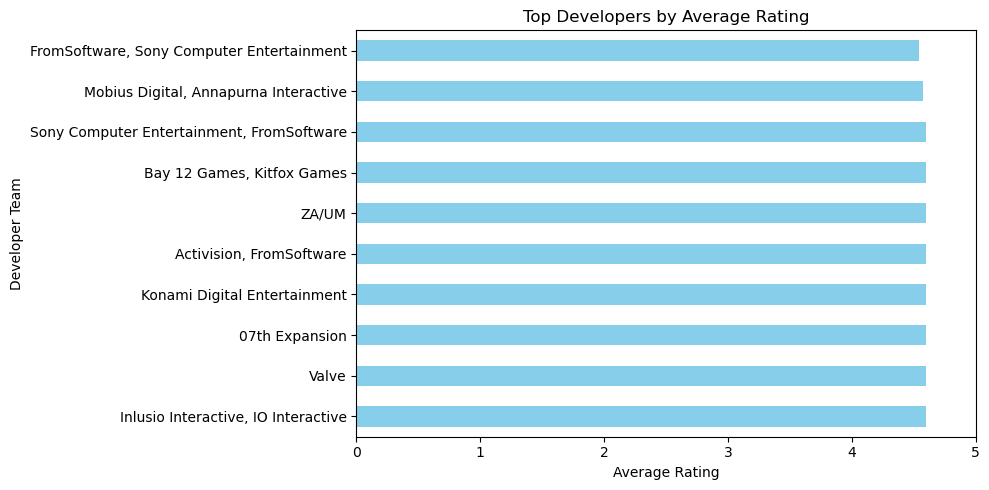

In [8]:
#2 Which developers (Teams) have the highest average ratings?

avg_rating_team = games.groupby("Team")["Rating"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
avg_rating_team.plot(kind='barh', color='skyblue')

plt.title("Top Developers by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Developer Team")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

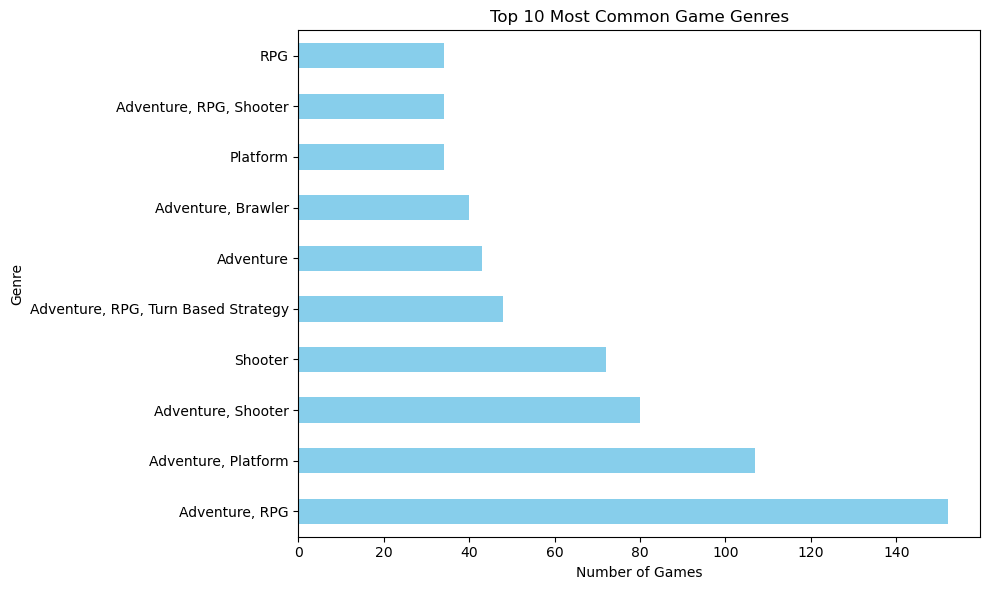

In [9]:
#3 What are the most common genres in the dataset?
count = games['Genres'].value_counts().head(10)

plt.figure(figsize=(10,6))
count.plot(kind='barh', color= 'skyblue')

plt.title("Top 10 Most Common Game Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

C:\Users\arkha\AppData\Local\Temp\ipykernel_11940\2558850959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Backlog-Wishlist-Ratio", y="Title", data=highestRatio, palette="coolwarm")


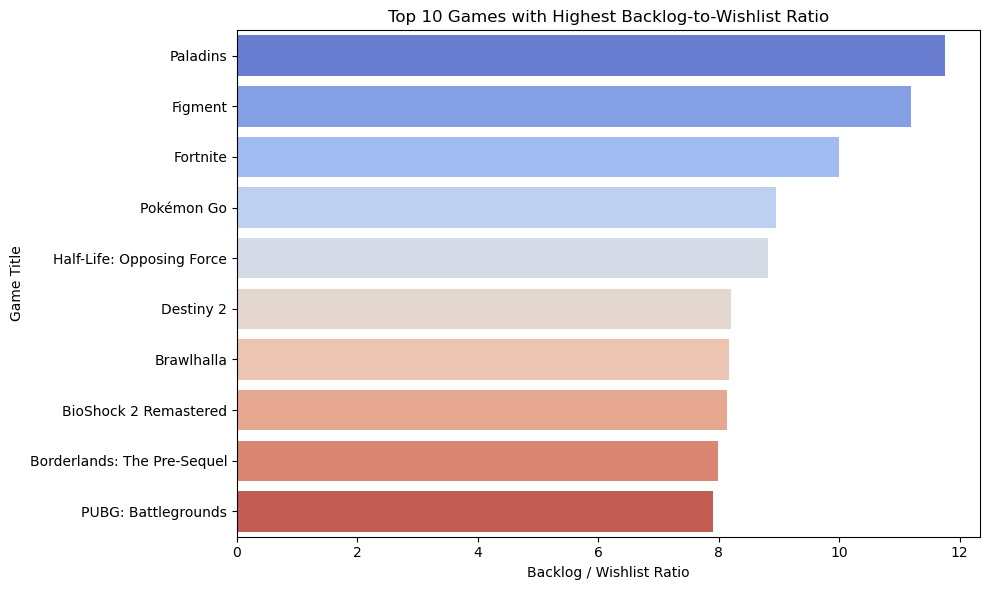

In [10]:
#4  Which games have the highest backlog compared to wishlist?

games['Backlog-Wishlist-Ratio'] = (games['Backlogs']/games['Wishlist']).round(4)
highestRatio = games.sort_values(by='Backlog-Wishlist-Ratio',ascending=False).drop_duplicates('Title').head(10)
# highestRatio.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Backlog-Wishlist-Ratio", y="Title", data=highestRatio, palette="coolwarm")

plt.title("Top 10 Games with Highest Backlog-to-Wishlist Ratio")
plt.xlabel("Backlog / Wishlist Ratio")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

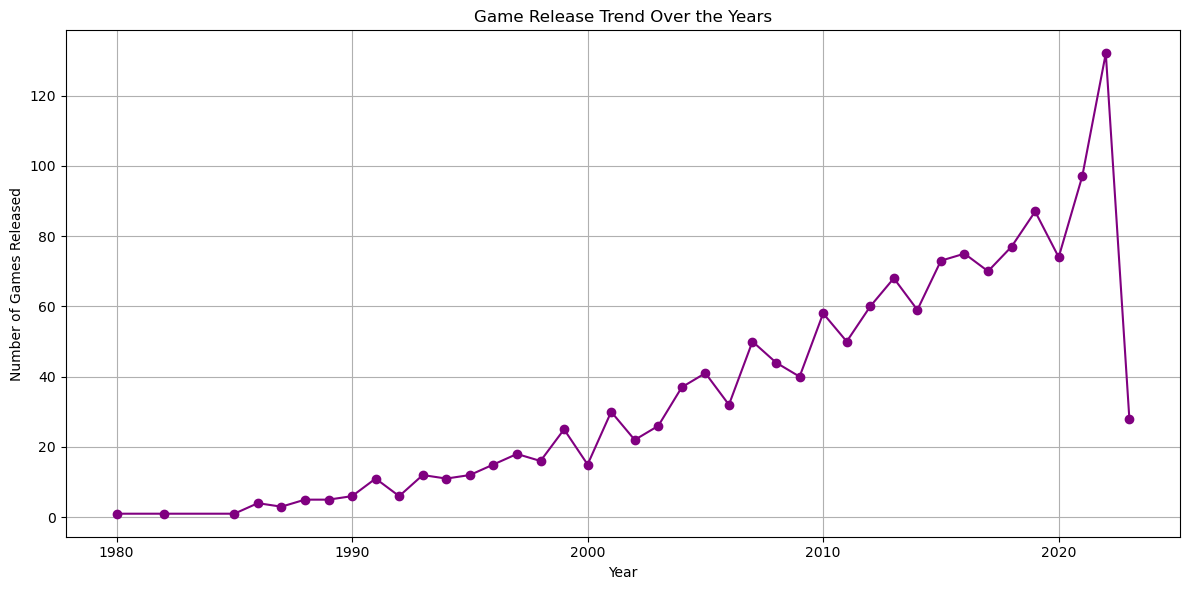

In [96]:
#5  What is the game release trend across years?
games["Release Date"] = pd.to_datetime(games["Release Date"], errors="coerce")  
games["Release Year"] = games["Release Date"].dt.year
release_trend = games['Release Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
release_trend.plot(marker="o", color="purple")
plt.title("Game Release Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.grid(True)
plt.tight_layout()
plt.show()

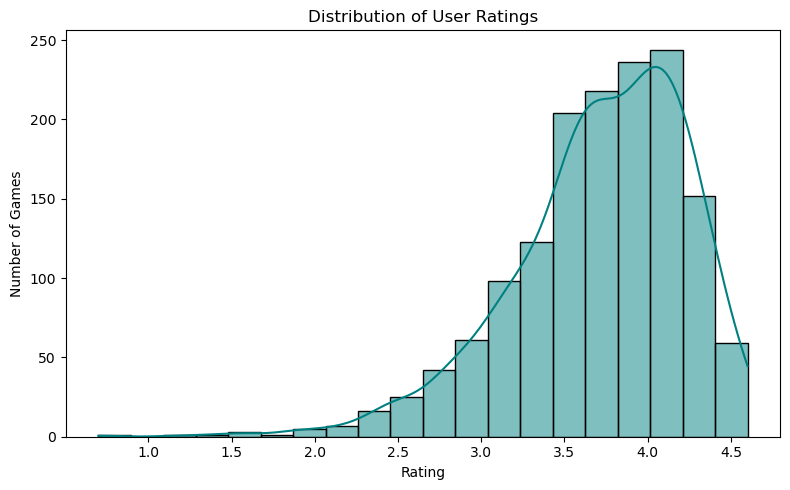

In [12]:
#6 What is the distribution of user ratings?

plt.figure(figsize=(8, 5))
sns.histplot(games["Rating"], bins=20, kde=True, color='teal')

plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

C:\Users\arkha\AppData\Local\Temp\ipykernel_11940\1764564225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Wishlist", y="Title", data=topWishlist, palette="coolwarm")


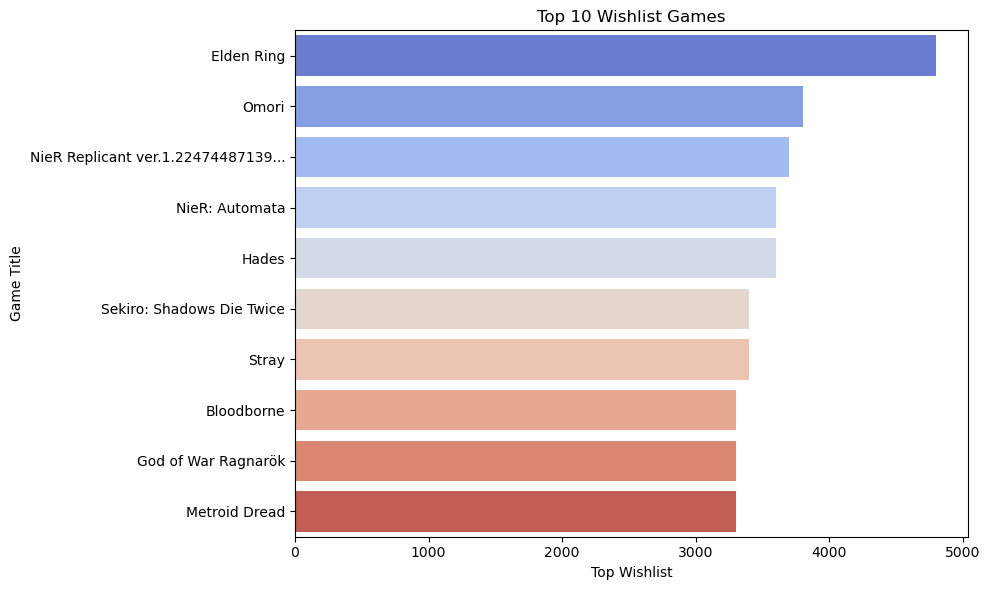

In [13]:
#7 What are the top 10 most wishlisted games?

topWishlist = games.sort_values(by='Wishlist', ascending=False).drop_duplicates('Title').head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Wishlist", y="Title", data=topWishlist, palette="coolwarm")

plt.title("Top 10 Wishlist Games")
plt.xlabel("Top Wishlist")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

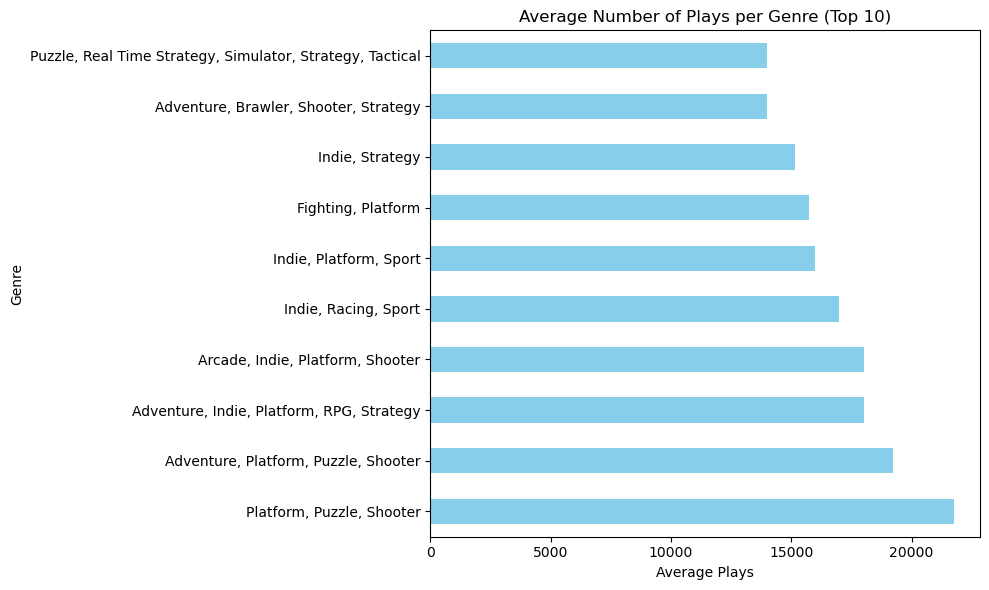

In [14]:
#8 What’s the average number of plays per genre?

avg_plays_genre = games.groupby("Genres")["Plays"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
avg_plays_genre.plot(kind="barh", color="skyblue")
plt.title("Average Number of Plays per Genre (Top 10)")
plt.xlabel("Average Plays")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

C:\Users\arkha\AppData\Local\Temp\ipykernel_11940\310357187.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_studios.reset_index(), x="Games Developed", y="Team", palette="Blues_d")


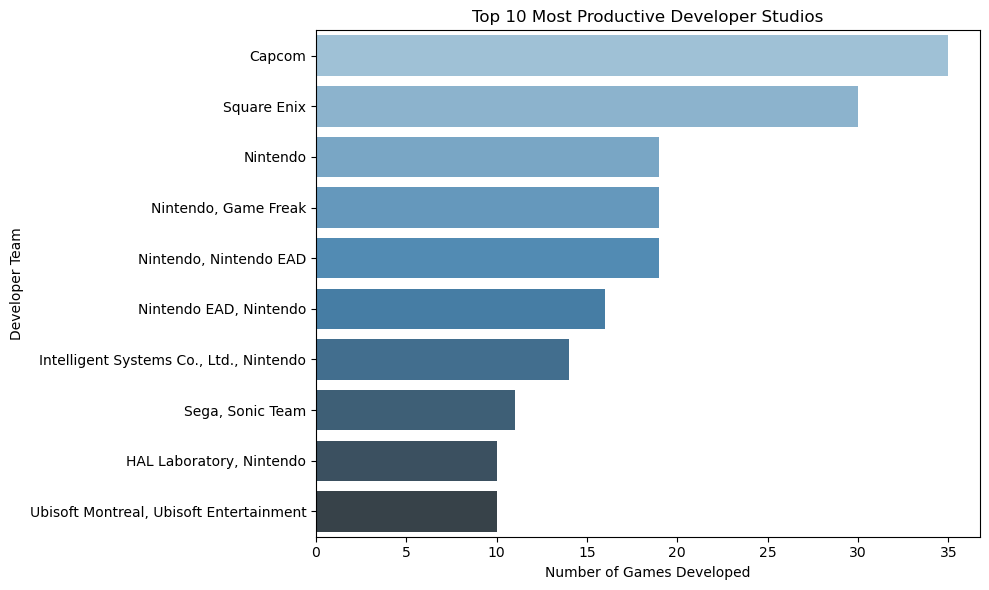

In [15]:
#9 Which developer studios are the most productive and impactful?

studio_stats = games.groupby("Team").agg({
    "Title": "count",
    "Plays": "sum"
}).rename(columns={"Title": "Games Developed", "Plays": "Total Plays"})

top_studios = studio_stats.sort_values(by="Games Developed", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_studios.reset_index(), x="Games Developed", y="Team", palette="Blues_d")

plt.title("Top 10 Most Productive Developer Studios")
plt.xlabel("Number of Games Developed")
plt.ylabel("Developer Team")
plt.tight_layout()
plt.show()


In [16]:
# -------------------

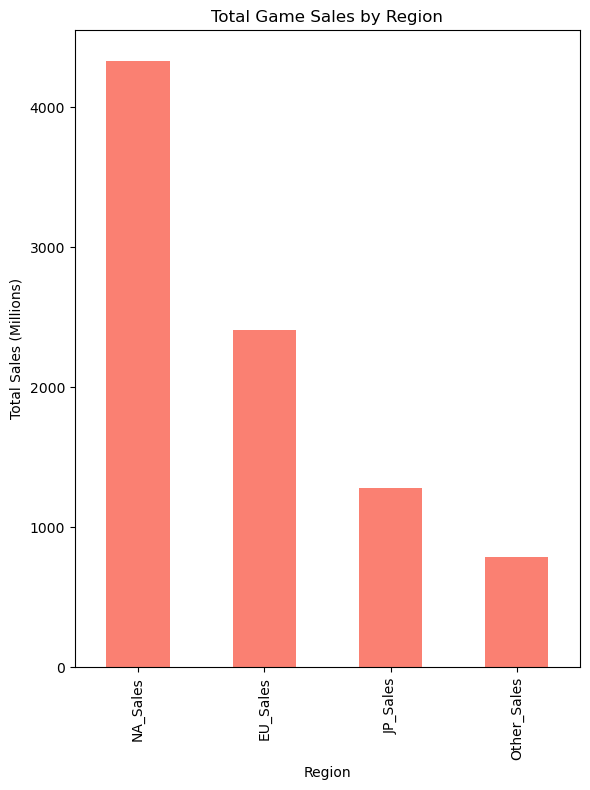

In [17]:
# 10  Which region generates the most game sales?

# Sum sales by region
region_sales = sales[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 8))
region_sales.plot(kind="bar", color="salmon")

plt.title("Total Game Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (Millions)")
plt.tight_layout()
plt.show()

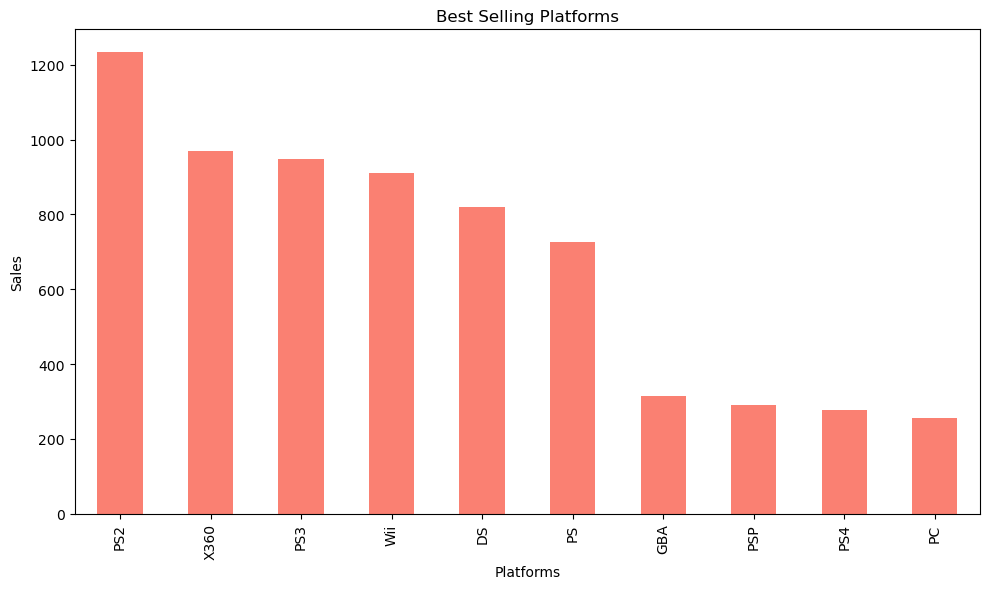

In [18]:
# 11 What are the best-selling platforms?
topPlatforms = sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
topPlatforms.plot(kind="bar", color="salmon")

plt.title("Best Selling Platforms")
plt.xlabel("Platforms")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

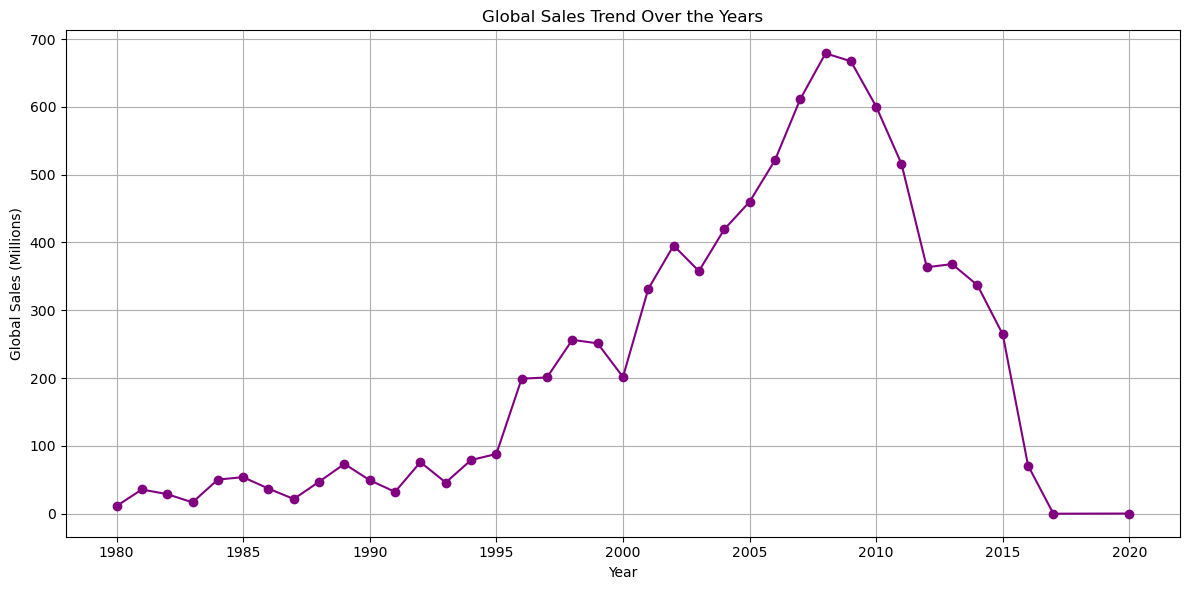

In [97]:
# 12 What’s the trend of game releases and sales over years?

# Group by Year and sum sales
sales_trend = sales.groupby("Year")["Global_Sales"].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot( marker="o", color="purple")

plt.title("Global Sales Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.tight_layout()
plt.show()

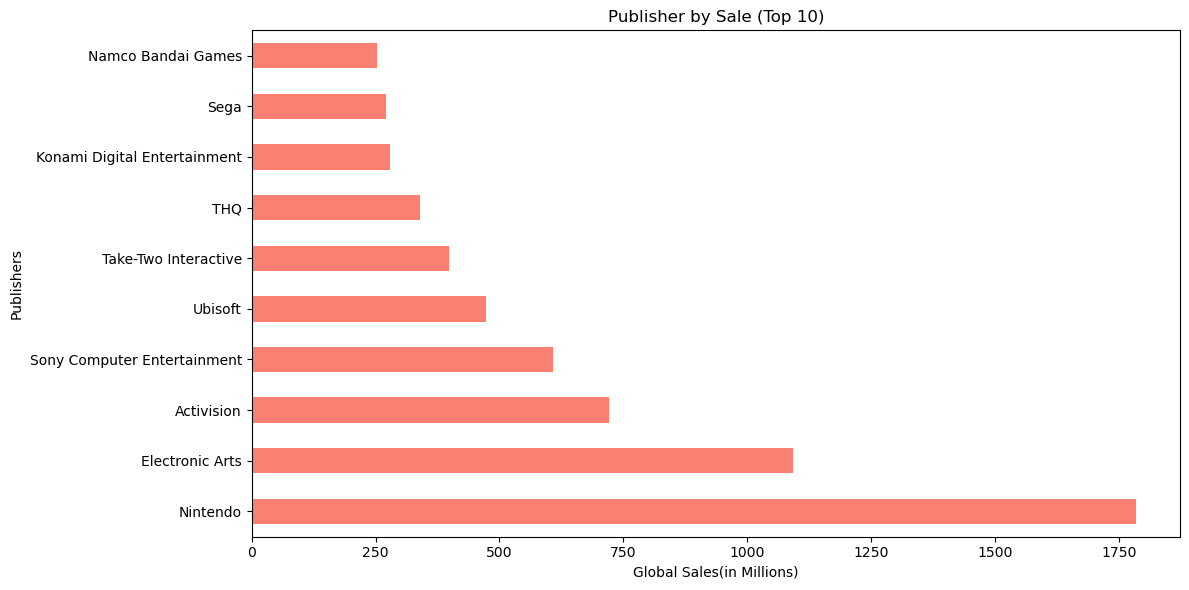

In [99]:
# 13 Who are the top publishers by sales?

publisher_by_sale = sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))


publisher_by_sale.plot(kind="barh", color="salmon")

plt.title("Publisher by Sale (Top 10)")
plt.xlabel("Global Sales(in Millions)")
plt.ylabel("Publishers")
plt.tight_layout()
plt.show()


C:\Users\arkha\AppData\Local\Temp\ipykernel_11940\488306474.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Global_Sales", y="Name", data=top_games, palette="crest")


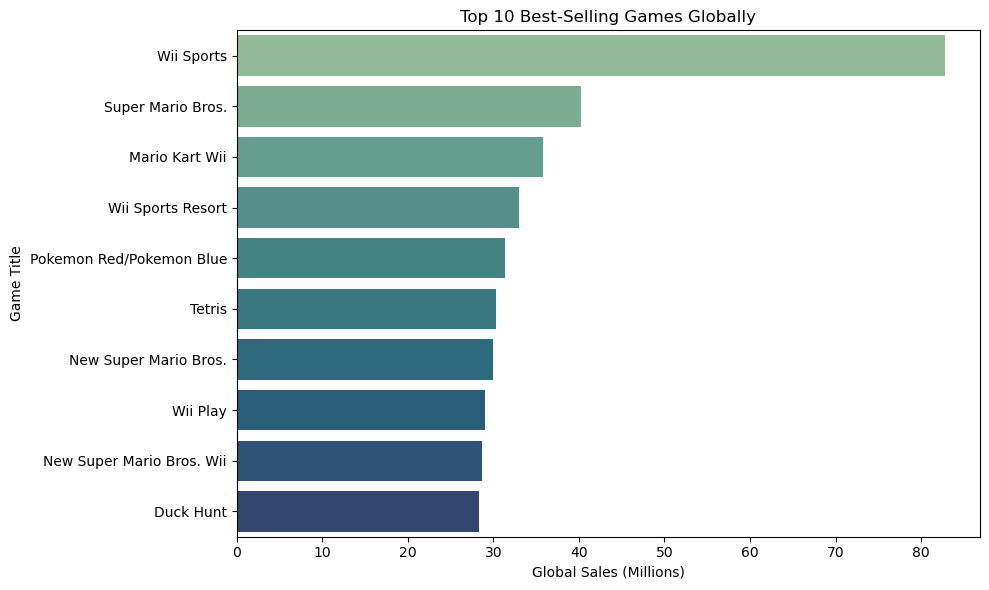

In [21]:
# 14 Which games are the top 10 best-sellers globally?

top_games = sales.sort_values(by="Global_Sales", ascending=False).drop_duplicates("Name").head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Global_Sales", y="Name", data=top_games, palette="crest")

plt.title("Top 10 Best-Selling Games Globally")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

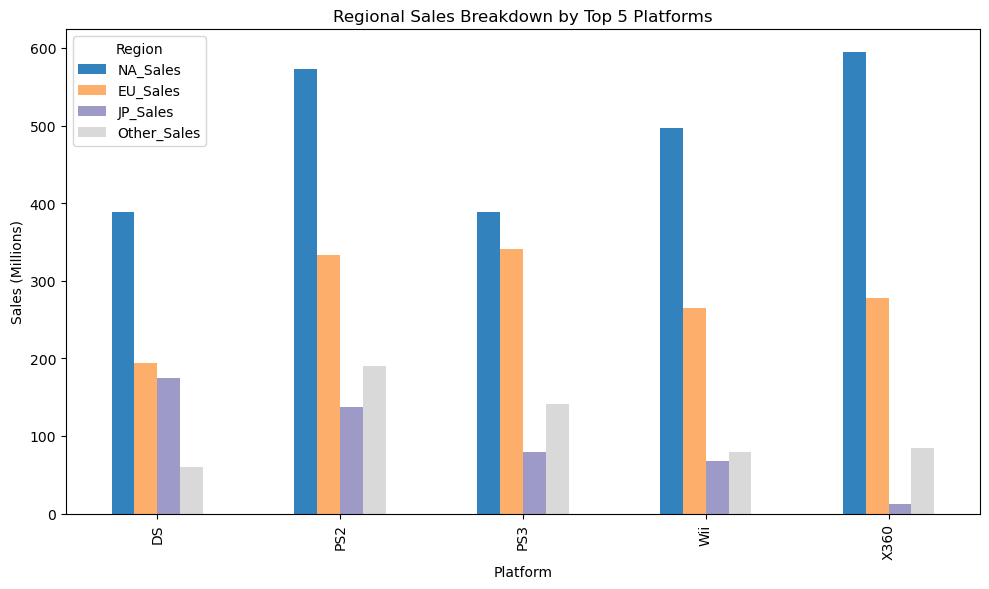

In [59]:
# 15 How do regional sales compare for specific platforms?
top5_platforms = sales["Platform"].value_counts().head(5).index
platform_sales = sales[sales["Platform"].isin(top5_platforms)]

# Group by Platform, sum regional sales
region_breakdown = platform_sales.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Plot
region_breakdown.plot(kind="bar", figsize=(10, 6), colormap="tab20c")

plt.title("Regional Sales Breakdown by Top 5 Platforms")
plt.xlabel("Platform")
plt.ylabel("Sales (Millions)")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

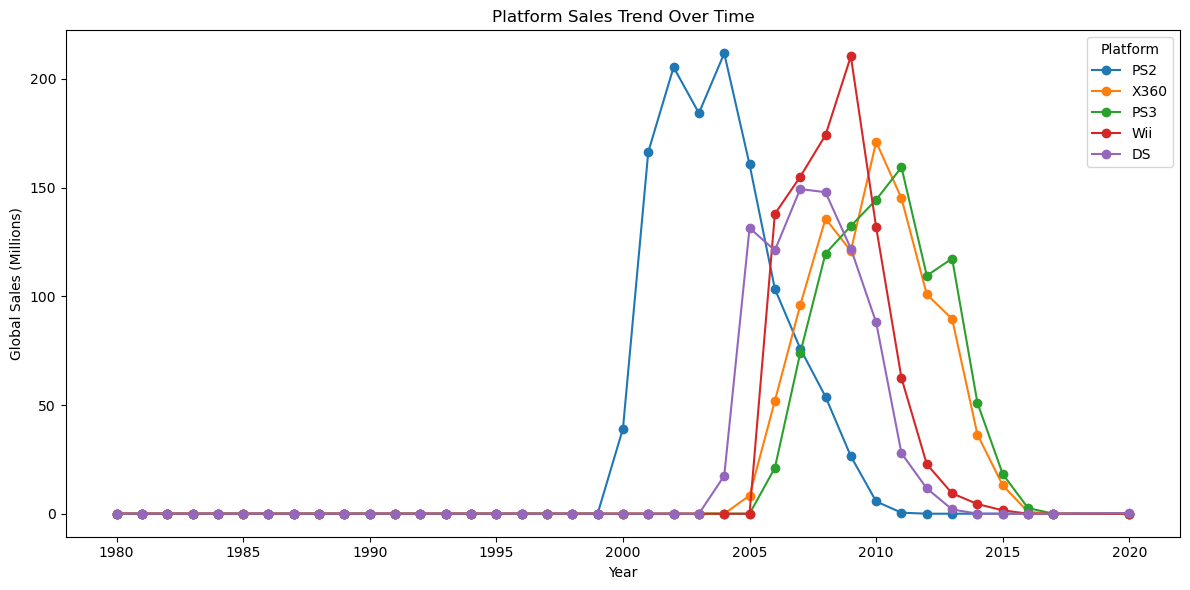

In [ ]:
# 16  How has the market evolved by platform over time?

# Group by Year & Platform
trend = sales.groupby(["Year", "Platform"])["Global_Sales"].sum().unstack().fillna(0)

#Top 5 platforms
top_platforms = trend.sum().sort_values(ascending=False).head(5).index

# Plot trend of top 5 platforms
trend[top_platforms].plot(figsize=(12, 6), marker='o')

plt.title("Platform Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()

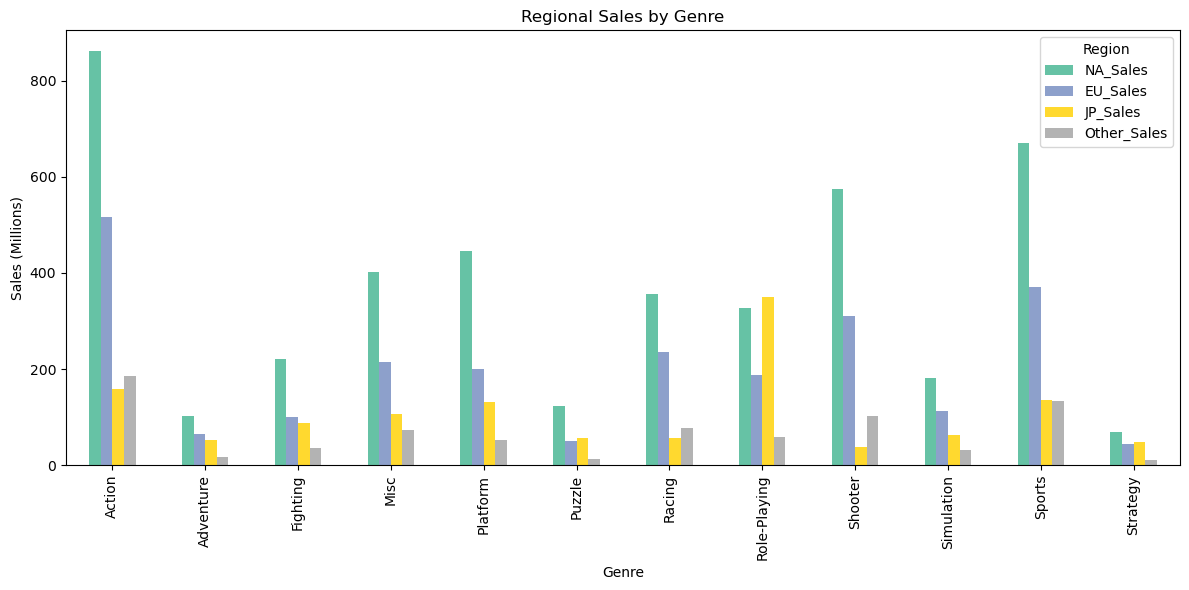

In [103]:
# 17 What are the regional genre preferences?
genre_sales = sales.groupby('Genre')[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

#plot

genre_sales.plot(kind='bar', figsize=(12,6), colormap='Set2')

plt.title("Regional Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales (Millions)")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

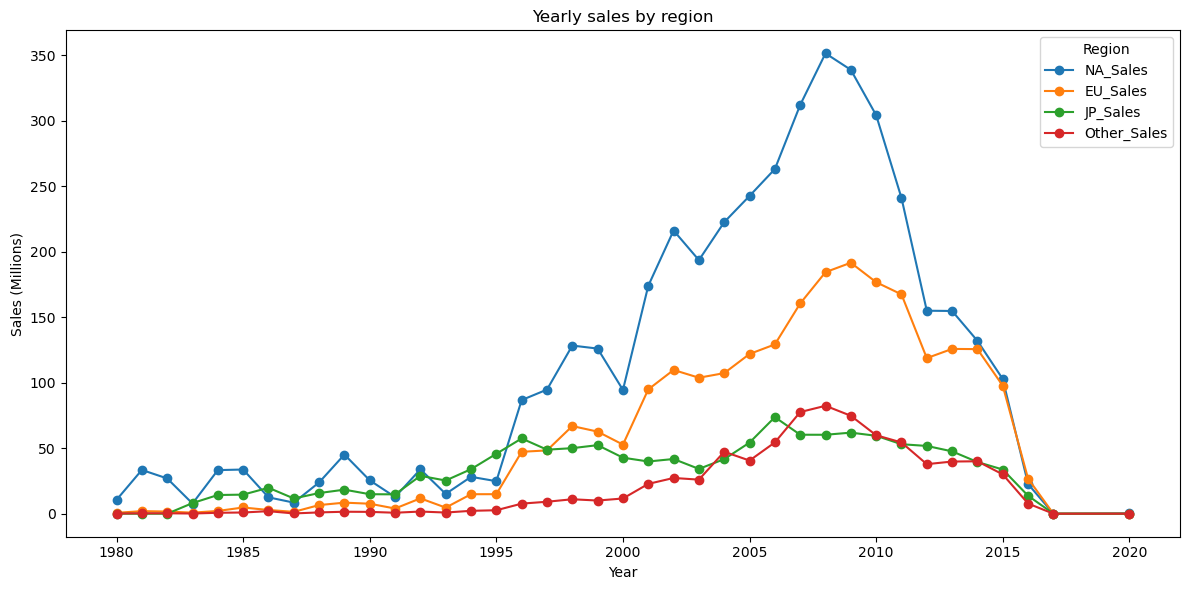

In [122]:
# 18 What’s the yearly sales change per region?

region_trend = sales.groupby('Year')[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

#plot
region_trend.plot(marker = 'o', figsize=(12,6))

plt.title("Yearly sales by region")
plt.xlabel("Year")
plt.ylabel("Sales (Millions)")
plt.legend(title = 'Region')
plt.tight_layout()
plt.show()

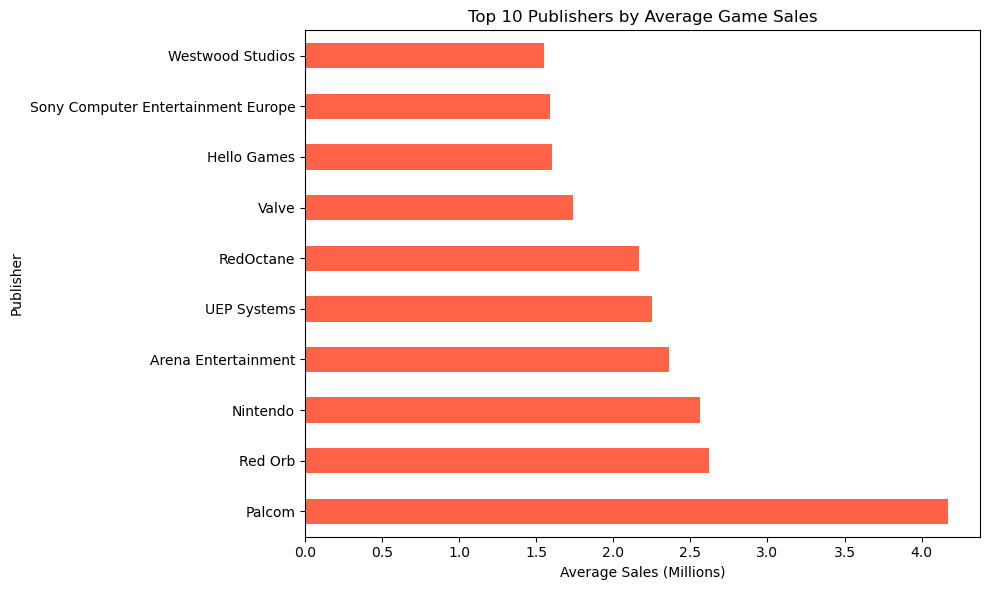

In [131]:
# 19 What is the average sales per publisher?

avgSales = sales.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)

#plot
avgSales.plot(kind='barh', figsize=(10,6), color = 'tomato')

plt.title("Top 10 Publishers by Average Game Sales")
plt.xlabel("Average Sales (Millions)")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()


In [220]:
# 20 What are the top 5 best-selling games per platform?

# For each platform, take the top 5 games
top5_per_platform = (
    sales.groupby("Platform")
                .head(5)
                .sort_values(['Platform', 'Global_Sales'], ascending=[True, False])
                [['Platform', 'Name', 'Global_Sales']]
)

# Reset index for cleaner display
top5_per_platform.reset_index(drop=True, inplace=True)

# Show result
pd.set_option('display.max_rows', 150)
# top5_per_platform.head(150)  # view first few rows

C:\Users\arkha\AppData\Local\Temp\ipykernel_11940\1522477891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_ds, x="Global_Sales", y="Name", palette="crest")


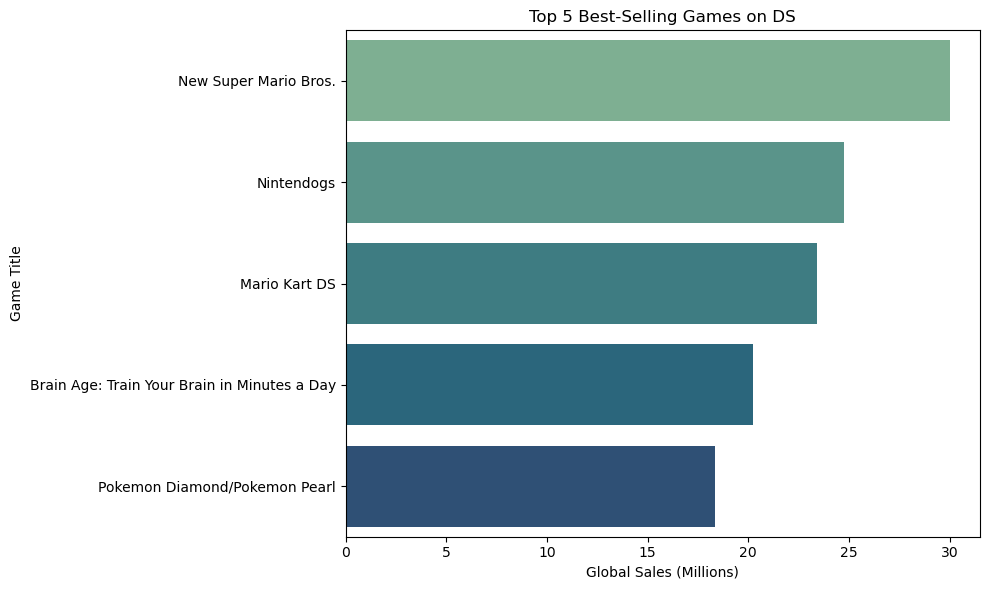

In [216]:
# Step 1: Choose the platform you want
selected_platform = 'DS'  # You can change this to 'PS2', 'PS3', etc.

# Step 2: Filter the DataFrame for just that platform
top5_ds = top5_per_platform[top5_per_platform['Platform'] == selected_platform]

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ds, x="Global_Sales", y="Name", palette="crest")

plt.title(f"Top 5 Best-Selling Games on {selected_platform}")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

In [221]:
#merged

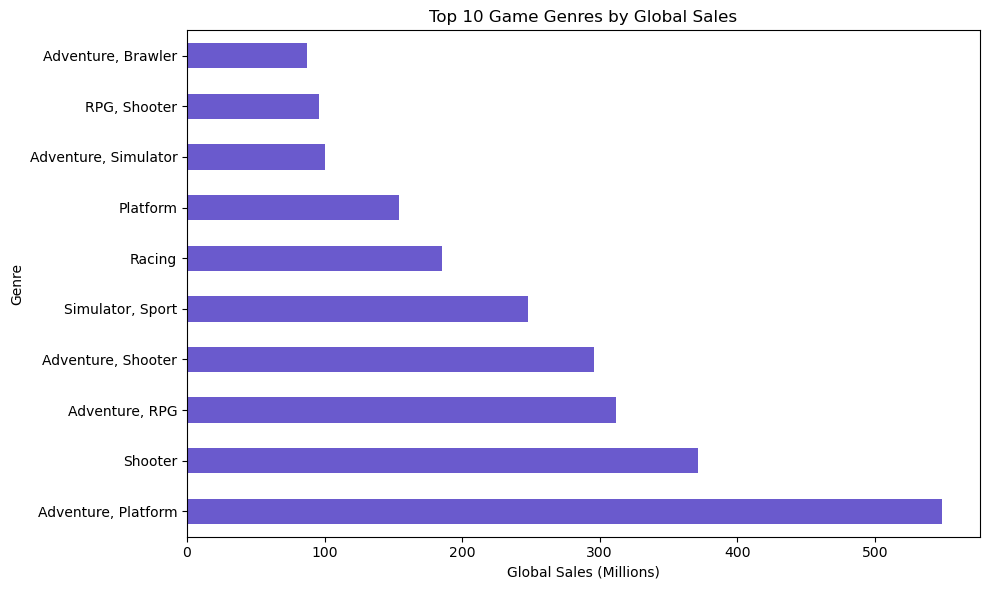

In [227]:
# 21 Which game genres generate the most global sales?

genre_sales = merged.groupby('Genres')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
genre_sales.plot(kind="barh", color="slateblue")

plt.title("Top 10 Game Genres by Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

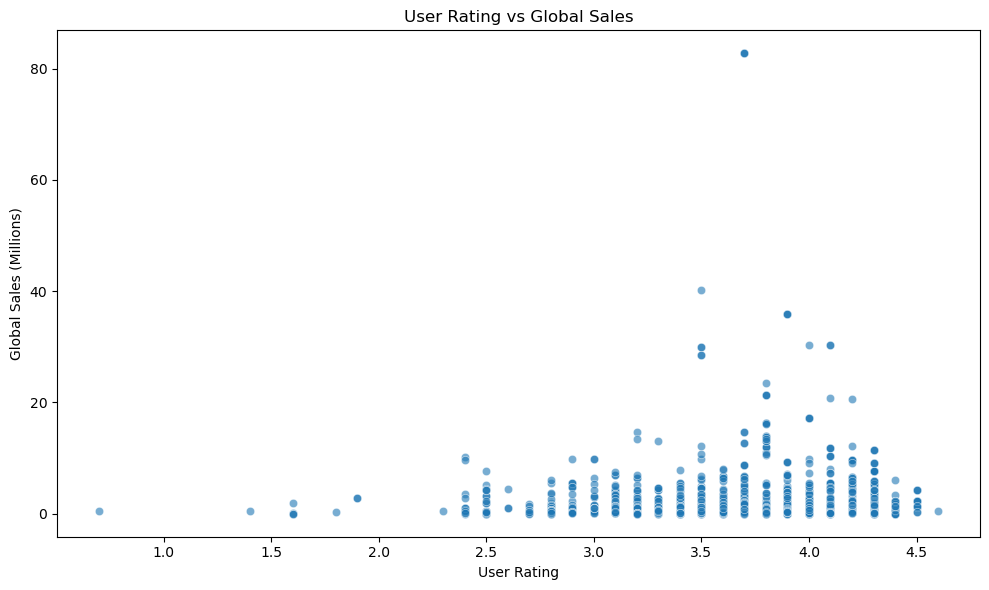

In [ ]:
# 22 How does user rating affect global sales?


plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x="Rating", y="Global_Sales", alpha=0.6)

plt.title("User Rating vs Global Sales")
plt.xlabel("User Rating")
plt.ylabel("Global Sales (Millions)")
plt.tight_layout()
plt.show()

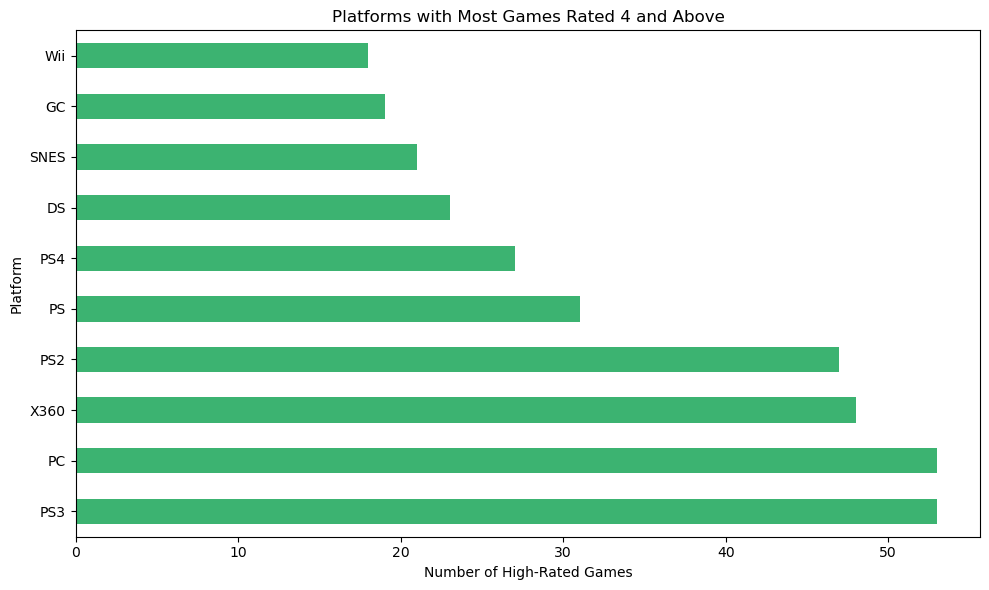

In [246]:
# 23 Which platforms have the most games with high ratings (e.g., above 4)?

high_rated = merged[merged["Rating"] >= 4]
platform_counts = high_rated["Platform"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
platform_counts.plot(kind="barh", color="mediumseagreen")

plt.title("Platforms with Most Games Rated 4 and Above")
plt.xlabel("Number of High-Rated Games")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

In [247]:
# 24 What’s the trend of releases and sales over time?

merged['Release Date'] = pd.to_datetime(merged['Release Date'], errors='coerce')
merged['Release Year'] = merged['Release Date'].dt.year



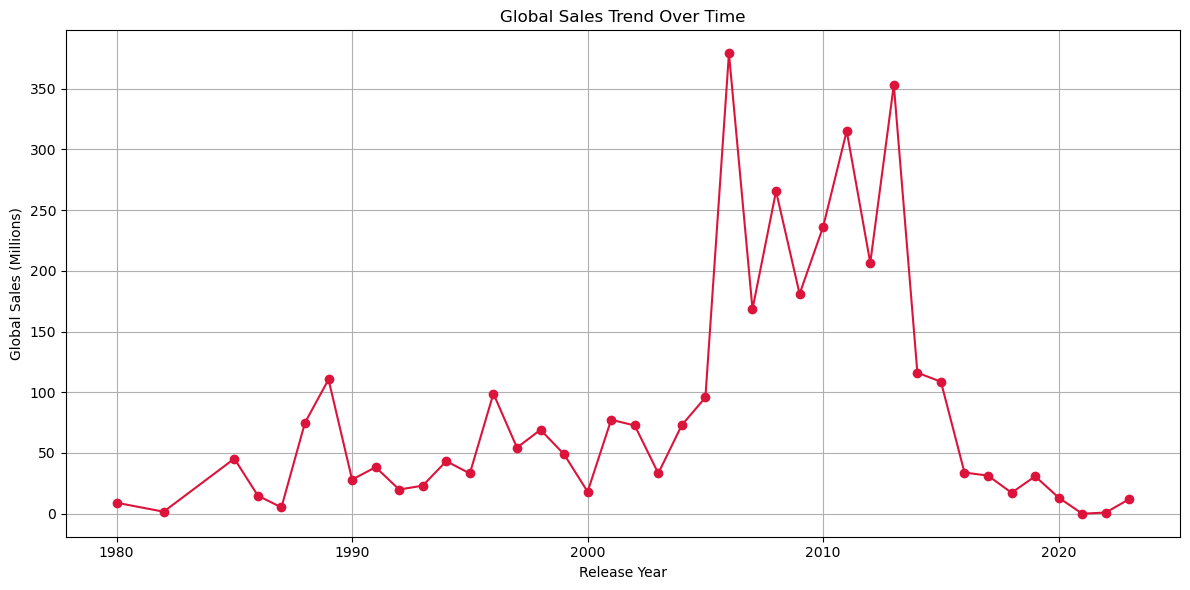

In [250]:
yearly = merged.groupby('Release Year')['Global_Sales'].sum()

#plot
plt.figure(figsize=(12, 6))
yearly.plot(kind="line", marker="o", color="crimson")

plt.title("Global Sales Trend Over Time")
plt.xlabel("Release Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.tight_layout()
plt.show()

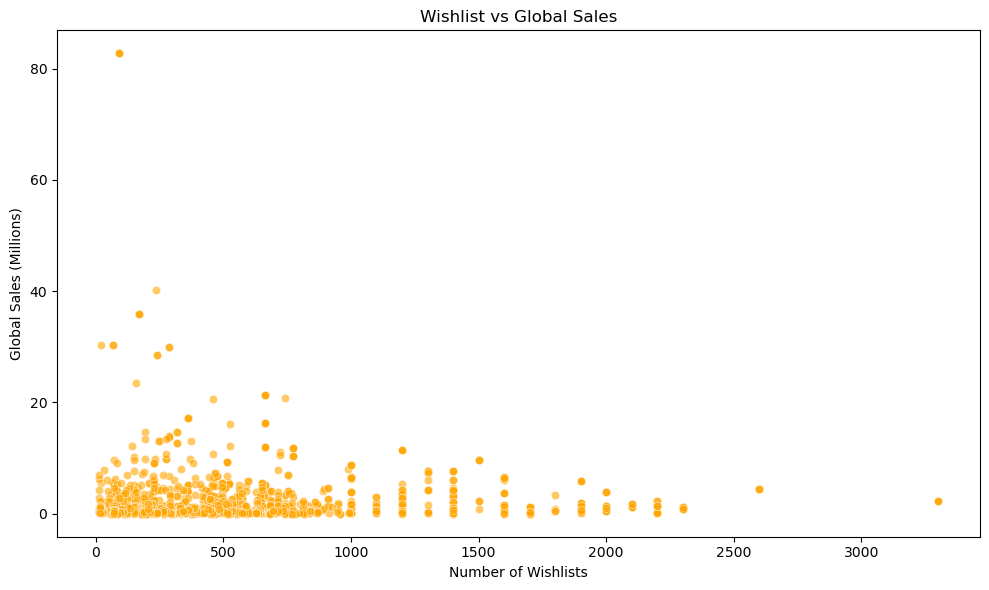

In [251]:
# 25 Do highly wishlisted games lead to more sales?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x="Wishlist", y="Global_Sales", alpha=0.6, color='orange')

plt.title("Wishlist vs Global Sales")
plt.xlabel("Number of Wishlists")
plt.ylabel("Global Sales (Millions)")
plt.tight_layout()
plt.show()

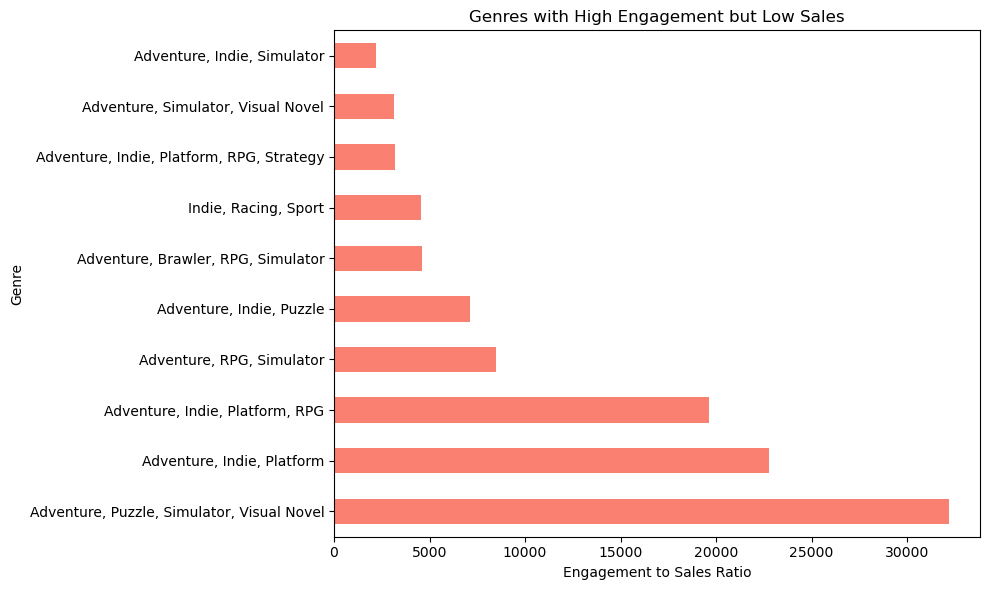

In [278]:
# 26 Which genres have the highest engagement but lowest sales?

#engage n sales
ens = merged.groupby('Genres')[['Playing','Global_Sales']].sum()

ens = ens[ens['Global_Sales'] > 0]

ens['Engagement/Sales Ratio'] = ens['Playing']/ens['Global_Sales']

evs = ens.sort_values(by='Engagement/Sales Ratio',ascending=False).head(10)

#plot
evs["Engagement/Sales Ratio"].plot(kind='barh', color="salmon",figsize=(10,6))

plt.title("Genres with High Engagement but Low Sales")
plt.xlabel("Engagement to Sales Ratio")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


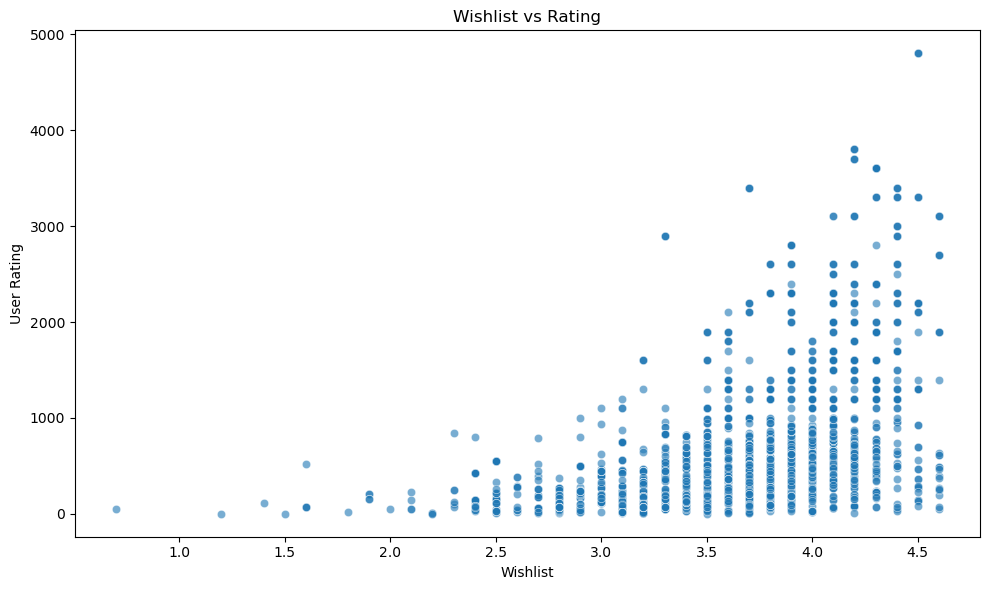

In [281]:
# 27 Do highly listed games (wishlist/backlogs) correlate with better ratings?

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='Rating', y='Wishlist', alpha = 0.6)

plt.title("Wishlist vs Rating")
plt.xlabel("Wishlist")
plt.ylabel("User Rating")
plt.tight_layout()
plt.show()


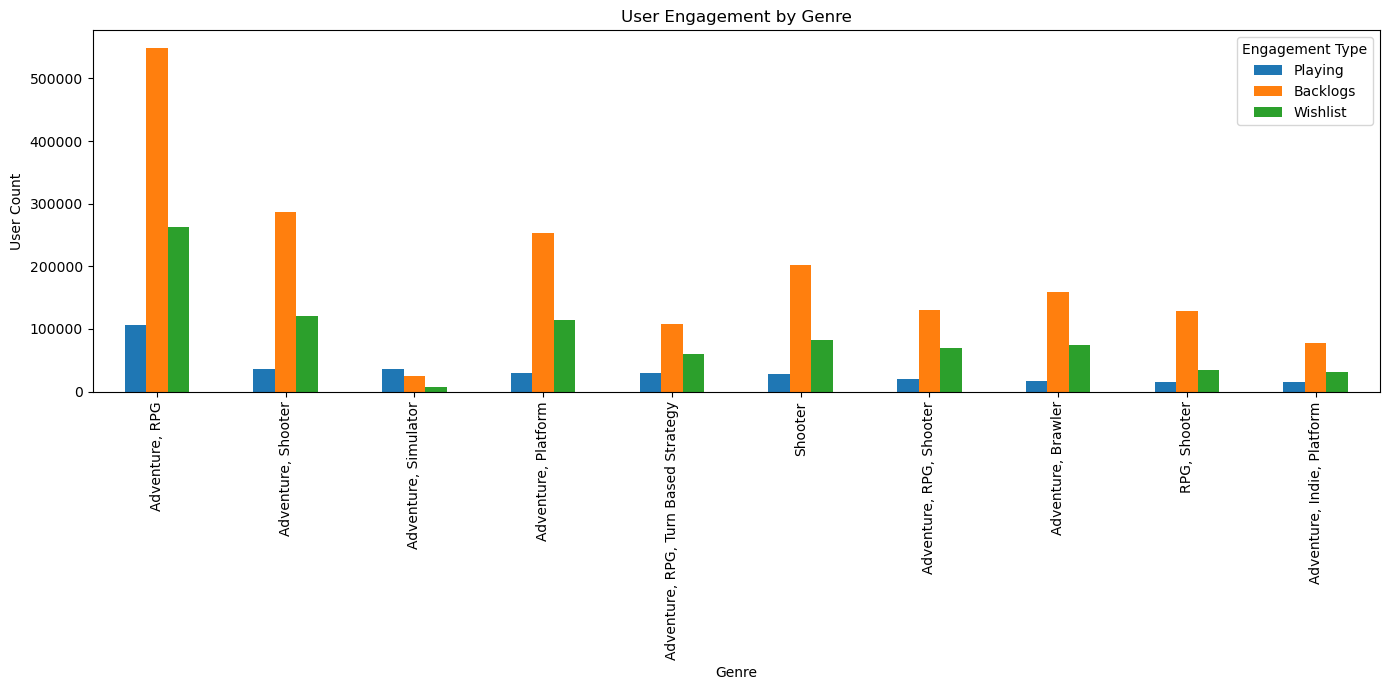

In [296]:
# 28 How does user engagement differ across genres?

genre_engagement = merged.groupby('Genres')[["Playing", "Backlogs", "Wishlist"]].sum().sort_values(by='Playing',ascending=False).head(10)

#plot
genre_engagement.plot(kind="bar",figsize=(14,7))

plt.title("User Engagement by Genre")
plt.xlabel("Genre")
plt.ylabel("User Count")
plt.legend(title="Engagement Type")
plt.tight_layout()
plt.show()


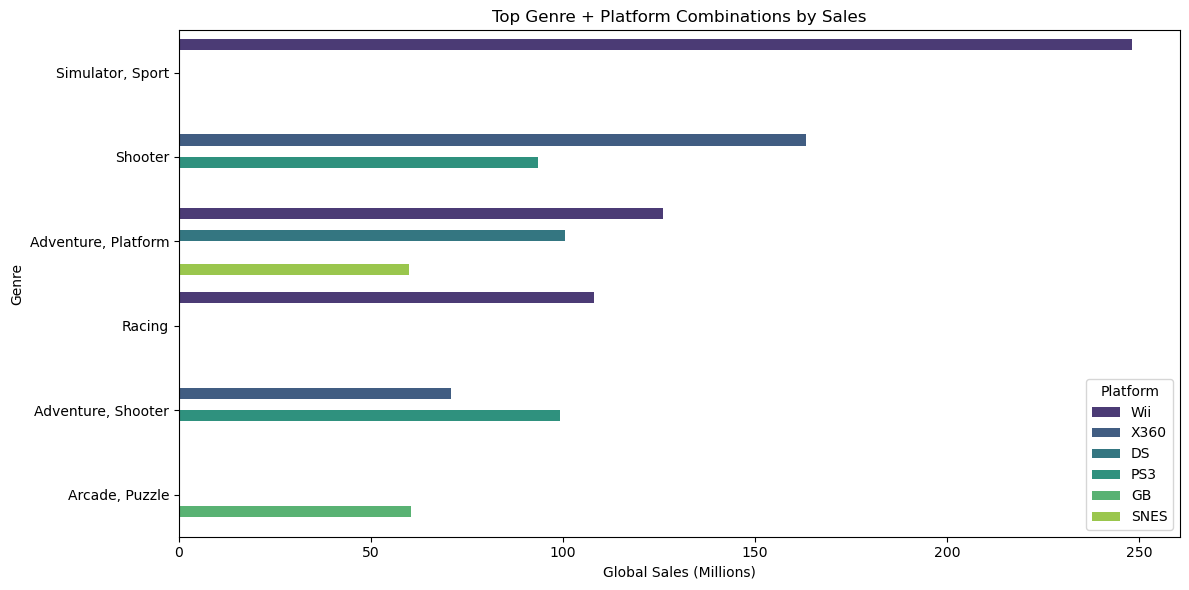

In [324]:
# 29 What are the top-performing combinations of Genre + Platform?

top_combination = merged.groupby(['Genres','Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

#plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_combination, x="Global_Sales", y="Genres", hue="Platform", palette="viridis")


plt.title("Top Genre + Platform Combinations by Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

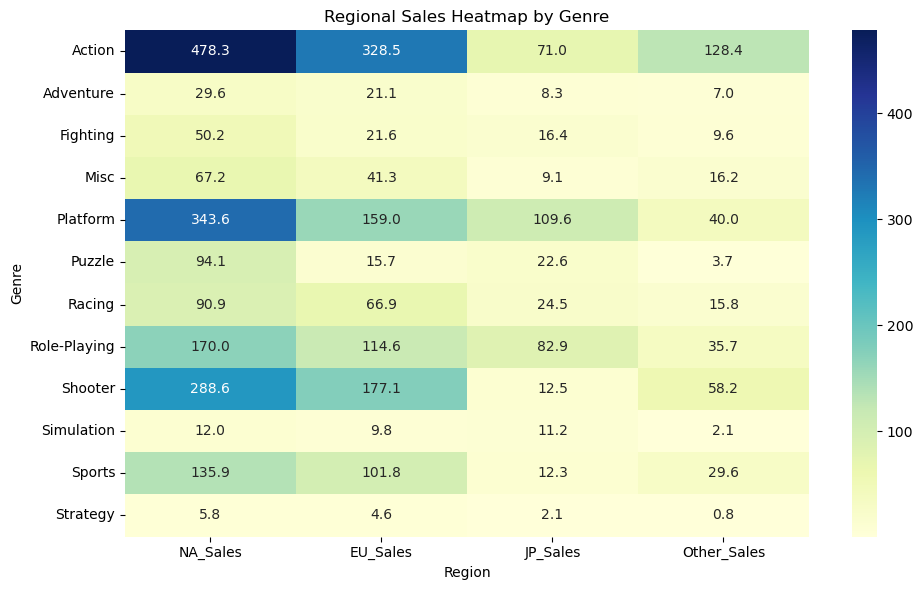

In [344]:
# 30 What does a regional sales heatmap by genre reveal?

region_sales = merged.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(region_sales, annot=True, fmt=".1f", cmap="YlGnBu")

plt.title("Regional Sales Heatmap by Genre")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()